In [3]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt



solver_name = "EKF1_2"
problem_name = "samples_from_prior_FHN_calibrated"
prefix = f"{solver_name}_{problem_name}"
folder = "./"

N = 20
delta = 1 / N
fineN = int(N ** 1.0)
T = 1
Ndeltas = T / delta
no_samples = 2

euler_parabola_ode_sols=jnp.load(f'{folder}/{prefix}_pathwise_sols4_parabola_ode_{N}_{fineN}.npy')
fine_em = jnp.load(f'{folder}/{prefix}_pathwise_sols2_{N}_{fineN}.npy')
low_res_em = jnp.load(f'{folder}/{prefix}_pathwise_sols3_{N}_{fineN}.npy')
mean = jnp.load(f'{folder}/{prefix}_mean_pn_{N}_1.npy')
var = jnp.load(f'{folder}/{prefix}_var_pn_{N}_1.npy')

In [11]:
var

Array([[[ 4.8648514e-04,  5.0526340e-03, -1.8778625e-05,  7.4850908e-04],
        [ 5.0526340e-03,  9.5773920e-02, -4.5247613e-03,  1.2103726e-02],
        [-1.8778625e-05, -4.5247613e-03,  4.3369751e-04, -4.6186408e-04],
        [ 7.4850908e-04,  1.2103726e-02, -4.6186408e-04,  1.5846305e-03]],

       [[ 7.3331414e-04,  4.0524458e-03,  3.2804045e-04,  7.7194156e-04],
        [ 4.0524458e-03,  8.0873127e+00, -8.0467904e-01,  8.1075704e-01],
        [ 3.2804045e-04, -8.0467904e-01,  8.0795929e-02, -8.0303796e-02],
        [ 7.7194156e-04,  8.1075704e-01, -8.0303796e-02,  8.1461653e-02]],

       [[ 2.4396889e-03,  2.5126091e-01, -2.2688655e-02,  2.6348168e-02],
        [ 2.5126091e-01,  5.0003319e+01, -4.7493029e+00,  5.1261926e+00],
        [-2.2688655e-02, -4.7493029e+00,  4.5226261e-01, -4.8629546e-01],
        [ 2.6348168e-02,  5.1261926e+00, -4.8629546e-01,  5.2581751e-01]],

       ...,

       [[ 2.2028864e-03,  2.1019250e-01, -5.8789555e-02,  6.2093910e-02],
        [ 2.1019250

In [12]:
mean

Array([[-1.13772368e-03, -2.44869441e-01,  2.33492237e-02,
        -1.53793335e-01],
       [-6.73697423e-03, -1.07203317e+00,  1.00466549e-01,
         1.47103262e+01],
       [-1.73589010e-02, -1.05385363e+00,  8.80316868e-02,
         3.23450494e+00],
       [-2.35255118e-02, -7.13678002e-02, -1.63771957e-02,
        -2.17469645e+00],
       [-3.00713945e-02, -1.34231853e+00,  1.04184918e-01,
         3.90690517e+00],
       [-4.30960283e-02, -1.27294338e+00,  8.42783153e-02,
        -3.49586678e+00],
       [-5.78155592e-02, -1.68078017e+00,  1.10455051e-01,
         2.89685488e+00],
       [-6.63947016e-02,  8.15230608e-02, -7.42690116e-02,
        -1.05294142e+01],
       [-6.41209036e-02,  4.09698159e-01, -1.04827523e-01,
         2.01642752e-01],
       [-5.66824861e-02,  1.13263726e+00, -1.69766009e-01,
        -2.48913980e+00],
       [-5.12879938e-02, -1.35807991e-01, -3.75772715e-02,
         7.93505669e+00],
       [-4.86840717e-02,  7.46829212e-01, -1.23254001e-01,
      

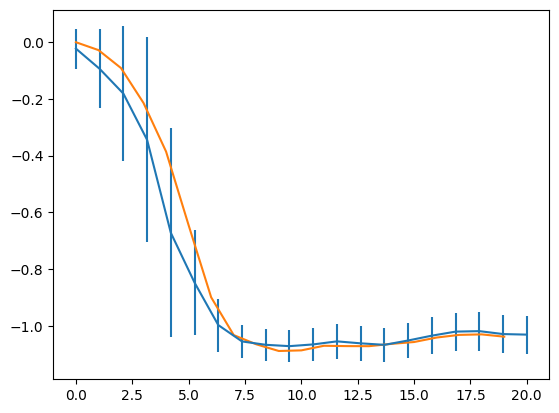

In [4]:
plt.errorbar(x=np.linspace(0, 20, len(mean[:,0])),y=mean[:,0],yerr=np.sqrt(var[:,0,0]))
plt.plot(fine_em[1:][::20][:,0])

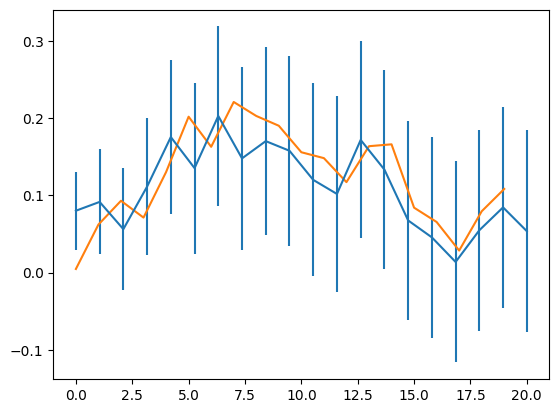

In [5]:
plt.errorbar(x=np.linspace(0, 20, len(mean[:,2])),y=mean[:,2],yerr=np.sqrt(var[:,2,2]))
plt.plot(fine_em[1:][::20][:,1])

(20, 4, 4)

In [35]:
fine_em[1:][::20][:,0]

Array([ 0.        , -0.02774381, -0.09103903, -0.21427879, -0.3855802 ,
       -0.6451536 , -0.89929044, -1.0325528 , -1.0650285 , -1.0886128 ,
       -1.0864369 , -1.0702223 , -1.0713654 , -1.0716623 , -1.0634619 ,
       -1.0569798 , -1.0411686 , -1.0318567 , -1.0300634 , -1.0381734 ],      dtype=float32)

In [38]:
fine_em[1]

Array([0.        , 0.00476125], dtype=float32)